# Imports

In [1]:
# Python Scripts
%run -i "Scripts/scripts.py"

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline
from sklearn.pipeline import Pipeline

# Gridsearch
from sklearn.model_selection import GridSearchCV

# AUC ROC CURVE
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Random Forest

In [2]:
random_forest = RandomForestClassifier(random_state=19, oob_score=True)
svm = SVC(random_state=19)

In [3]:
# Random Forest grid search
param_forest = {"n_estimators":[300, 400], "max_depth":[5, 10, 15, 20]}
grid_forest = GridSearchCV(random_forest, param_grid=param_forest, cv=10)

In [4]:
grid_forest.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=19,
                                  

In [5]:
grid_forest.best_params_

{'max_depth': 20, 'n_estimators': 400}

In [7]:
grid_forest.cv_results_

{'mean_fit_time': array([12.18688412, 16.05780041, 21.97823305, 29.70882988, 30.41397171,
        40.52461584, 35.56753399, 69.62446673]),
 'std_fit_time': array([ 0.22008636,  0.12045271,  0.20528849,  0.16260372,  0.09380517,
         0.20901353,  0.27180396, 67.23866003]),
 'mean_score_time': array([0.13015814, 0.17128446, 0.21044025, 0.27990613, 0.3221777 ,
        0.42577553, 0.45924673, 0.6023747 ]),
 'std_score_time': array([0.00418601, 0.00393056, 0.00838524, 0.01367975, 0.02285747,
        0.03533156, 0.02955256, 0.04479299]),
 'param_max_depth': masked_array(data=[5, 5, 10, 10, 15, 15, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300, 400, 300, 400, 300, 400, 300, 400],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 30

In [17]:
# Best mean test score
grid_forest.best_score_

0.7756272088196796

In [14]:
display(grid_forest.score(X_train_new, y_train_new))
display(grid_forest.score(X_test, y_test))

0.9308391307303587

0.700141898864809

### Confusion Matrix

In [18]:
# Able to determine metrics for a confusion matrix
def confusion_matrix_metrics(TN:int, FP:int, FN:int, TP:int, P:int, N:int):
    print("TNR:", TN/N)
    print("FPR:", FP/N)
    print("FNR:", FN/P)
    print("TPR:", TP/P)
    print("Precision:", TP/(TP+FP))  # What proportion of positive identifications was actually correct
    print("Recall:", TP/(TP+FN))  # What proportion of actual positives was identified correctly
    print("F1 Score:", (2*TP)/((2*TP) + (FP + FN)))  # the harmonic mean of precision and recall and is a better measure than accuracy

In [19]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, grid_forest.predict(X_train_new), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          39091   5038  44129
1           1066  43063  44129
All        40157  48101  88258


In [20]:
confusion_matrix_metrics(TN=39091, FP=5038, FN=1066, TP=43063, P=44129, N=44129)

TNR: 0.8858347118674794
FPR: 0.11416528813252057
FNR: 0.02415645040676199
TPR: 0.975843549593238
Precision: 0.8952620527639757
Recall: 0.975843549593238
F1 Score: 0.9338176298384474


In [21]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, grid_forest.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0           821   3688   4509
1           961  10034  10995
All        1782  13722  15504


In [22]:
confusion_matrix_metrics(TN=821, FP=3688, FN=961, TP=10034, P=10995, N=4509)

TNR: 0.18208028387669106
FPR: 0.8179197161233089
FNR: 0.08740336516598454
TPR: 0.9125966348340154
Precision: 0.7312345139192538
Recall: 0.9125966348340154
F1 Score: 0.8119108306024194


### AUC ROC CURVE

In [25]:
# Training data
roc_auc_score(y_train_new, grid_forest.predict(X_train_new))

0.9308391307303587

In [24]:
# Testing data
roc_auc_score(y_test, grid_forest.predict(X_test))

0.5473384593553532

# Feature Extraction 

In [27]:
# Appling random forest instantiation with grid search hyperparameter tuning variables
rf_clf = RandomForestClassifier(n_estimators=400, max_depth=20, random_state=19, oob_score=True)

In [28]:
# Passing SMOTE data through random forest
rf_clf.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=19, verbose=0,
                       warm_start=False)

In [32]:
# Out of Bag data
rf_clf.oob_score_

0.7848353690317025

In [33]:
display(rf_clf.score(X_train_new, y_train_new))
display(rf_clf.score(X_test, y_test))

0.9308391307303587

0.700141898864809

<BarContainer object of 40 artists>

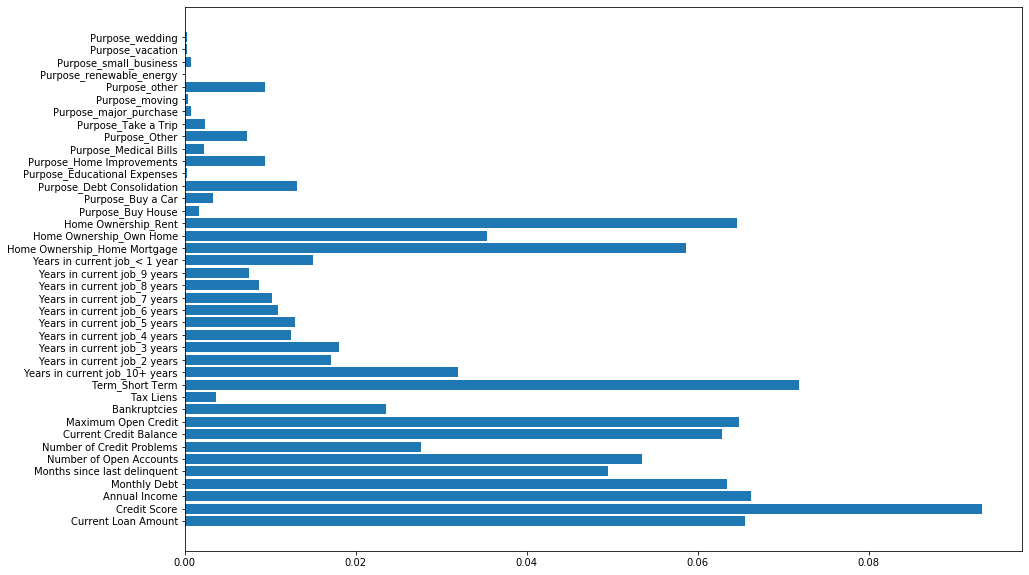

In [34]:
# Graphing
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(width=rf_clf.feature_importances_, y=X_train_new.columns)

In [95]:
# Selecting the top features at a cap of 0.05
top_important_features = np.where(rf_clf.feature_importances_ > 0.05)
print(top_important_features)
print(len(top_important_features[0]))  # Number of features that qualify

(array([ 0,  1,  2,  3,  5,  7,  8, 11, 22, 24]),)
10


In [104]:
# Extracting the top feature column names
top_important_feature_names = [columns for columns in X_train_new.columns[top_important_features]]
top_important_feature_names

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Number of Open Accounts',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Term_Short Term',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Rent']

In [112]:
# Creating new training and testing data with top features
important_train_features = X_train_new[top_important_feature_names]
important_test_features = X_test[top_important_feature_names]

In [118]:
important_train_features.shape, important_test_features.shape, y_train_new.shape, y_test.shape

((88258, 10), (15504, 10), (88258,), (15504,))

In [114]:
important_train_features.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Rent
0,44572.0,721.0,481270.0,5173.70,3.0,13623.0,26752.0,1,0,0
1,199958.0,74.0,973370.0,17240.60,6.0,88502.0,112970.0,1,0,0
2,516604.0,714.0,1357037.0,23748.29,14.0,393053.0,524942.0,1,0,0
3,532576.0,716.0,1154706.0,0.00,1.0,0.0,0.0,1,0,1
4,90024.0,749.0,633935.0,12837.16,11.0,66880.0,285736.0,1,0,1


In [115]:
important_test_features.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Rent
74241,642598.0,74.0,1109942.0,9526.79,12.0,193781.0,1752938.0,1,1,0
41986,444048.0,724.0,1246362.0,13398.42,9.0,20197.0,95436.0,0,1,0
36143,467324.0,677.0,1424430.0,21603.95,23.0,267273.0,801768.0,0,0,1
62116,84656.0,732.0,835506.0,4783.25,7.0,10070.0,65824.0,1,1,0
57132,21868.0,665.0,1133502.0,15491.27,4.0,58501.0,69982.0,1,0,1


In [119]:
rf_clf.fit(important_train_features, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=19, verbose=0,
                       warm_start=False)

### Random Forest Model Evaluation: Feature Extraction

In [120]:
print("Train Score:", rf_clf.score(important_train_features, y_train_new))
print("Test Score:", rf_clf.score(important_test_features, y_test))
print("OOB Score:", rf_clf.oob_score_)

Train Score: 0.9504294228285255
Test Score: 0.6727296181630547
OOB Score: 0.7639080876521108


In [121]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, rf_clf.predict(important_train_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          41246   2883  44129
1           1492  42637  44129
All        42738  45520  88258


In [122]:
confusion_matrix_metrics(TN=41246, FP=2883, FN=1492, TP=42637, P=44129, N=44129)

TNR: 0.9346688118924064
FPR: 0.06533118810759364
FNR: 0.03380996623535543
TPR: 0.9661900337646445
Precision: 0.9366652021089631
Recall: 0.9661900337646445
F1 Score: 0.9511985632857032


In [124]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, rf_clf.predict(important_test_features), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0          1360   3149   4509
1          1925   9070  10995
All        3285  12219  15504


In [126]:
confusion_matrix_metrics(TN=1360, FP=3149, FN=1925, TP=9070, P=10995, N=4509)

TNR: 0.3016189842537148
FPR: 0.6983810157462852
FNR: 0.17507958162801274
TPR: 0.8249204183719873
Precision: 0.7422866028316556
Recall: 0.8249204183719873
F1 Score: 0.7814250021538727


## Support Vector Machine

In [127]:
# Support Vector Machine grid search
param_svm = {"C":[0.1, 1.0]}
grid_svm = GridSearchCV(svm, param_grid=param_svm)

In [ ]:
grid_svm.fit(X_train_rescaled, y_train_new)